<function matplotlib.pyplot.show(close=None, block=None)>

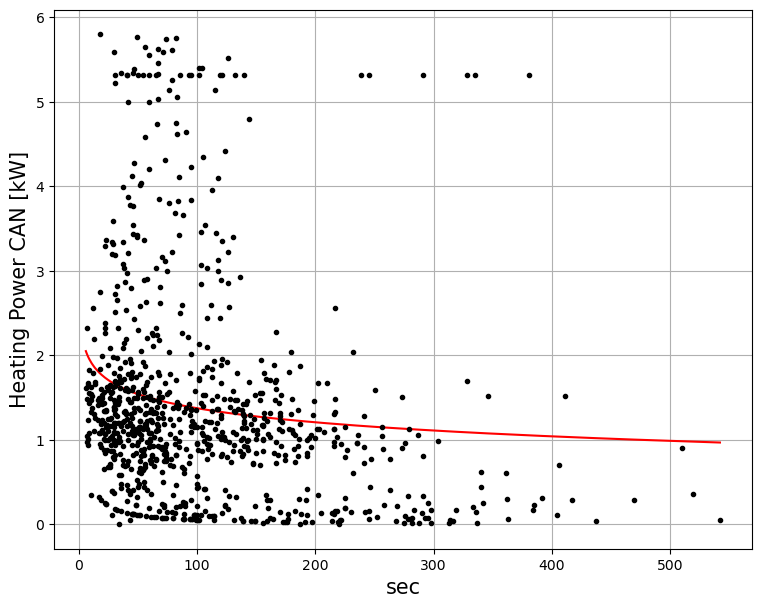

In [1]:
#### 첫번째 분석 방법 산점도 다항식 근사

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

A_soc = pd.read_csv('./soc_con/TripA_soc_con_final.csv')
B_soc = pd.read_csv('./soc_con/TripB_soc_con_final.csv')

col = ['SoC_len','Velocity [km/h]','Elevation [m]','Throttle [%]','Motor Torque [Nm]','Longitudinal Acceleration [m/s^2]'\
      ,'Battery Voltage [V]','Battery Current [A]','Battery Temperature [°C]','Heating Power CAN [kW]','AirCon Power [kW]']
A_soc = A_soc[col]
B_soc = B_soc[col]
A_soc = A_soc.rename(columns={'SoC_len':'sec'})
B_soc = B_soc.rename(columns={'SoC_len':'sec'})


def objective_0(x,a,b,c):
    return a *(x**2) +b*x +c
def objective_1(x,a,b):
    return a/x +b
def objective_2(x,a,b):
    return -a*np.log10(x)+b
def objective_3(x,a,b):
    return a**x +b

A_soc = A_soc[['sec','Throttle [%]','Heating Power CAN [kW]','AirCon Power [kW]']]
B_soc = B_soc[['sec','Throttle [%]','Heating Power CAN [kW]','AirCon Power [kW]']]
AB_soc = pd.concat([A_soc,B_soc]).sort_values('sec',ascending=True)
col = ['sec','Throttle [%]','Heating Power CAN [kW]','AirCon Power [kW]']

AB_air = AB_soc[['sec','AirCon Power [kW]']]
AB_air = AB_air[AB_air['AirCon Power [kW]'] > 0 ]

AB_thro = AB_soc[['sec','Throttle [%]']]
AB_thro = AB_thro[AB_thro['Throttle [%]'] > 0]

AB_heat = AB_soc[['sec','Heating Power CAN [kW]']]
AB_heat = AB_heat[(AB_heat['Heating Power CAN [kW]']>0)&(AB_heat['Heating Power CAN [kW]']<10)]
# # 
# x = AB_thro['sec']
# y = AB_thro['Throttle [%]']
# plt.figure(figsize =(9,7))
# plt.errorbar(x,y,fmt='.k',capsize=1.5,elinewidth=0.5)
# # popt, pcov = curve_fit(objective_0, x, y)
# # plt.plot(x,objective_0(x,*popt),'r')
# # popt, pcov = curve_fit(objective_1, x, y)
# # plt.plot(x,objective_1(x,*popt),'r')
# # popt, pcov = curve_fit(objective_2, x, y)
# # plt.plot(x,objective_2(x,*popt),'r')
# # popt, pcov = curve_fit(objective_3, x, y)
# # plt.plot(x,objective_3(x,*popt),'r')
# plt.xlabel('sec',size=15)
# plt.ylabel('Throttle [%]',size=15)
# plt.grid(True)
# plt.show


# x = AB_air['sec']
# y = AB_air['AirCon Power [kW]']
# plt.figure(figsize =(9,7))
# plt.errorbar(x,y,fmt='.k',capsize=1.5,elinewidth=0.5)
# popt, pcov = curve_fit(objective_0, x, y)
# plt.plot(x,objective_0(x,*popt),'r')
# # popt, pcov = curve_fit(objective_1, x, y)
# # plt.plot(x,objective_1(x,*popt),'r')
# # popt, pcov = curve_fit(objective_2, x, y)
# # plt.plot(x,objective_2(x,*popt),'r')
# # popt, pcov = curve_fit(objective_3, x, y)
# # plt.plot(x,objective_3(x,*popt),'r')
# plt.xlabel('sec',size=15)
# plt.ylabel('AirCon Power [kW]',size=15)
# plt.grid(True)
# plt.show


x = AB_heat['sec']
y = AB_heat['Heating Power CAN [kW]']
plt.figure(figsize =(9,7))
plt.errorbar(x,y,fmt='.k',capsize=1.5,elinewidth=0.5)
# popt, pcov = curve_fit(objective_0, x, y)
# plt.plot(x,objective_0(x,*popt),'r')
# popt, pcov = curve_fit(objective_1, x, y)
# plt.plot(x,objective_1(x,*popt),'r')
popt, pcov = curve_fit(objective_2, x, y)
plt.plot(x,objective_2(x,*popt),'r')
# popt, pcov = curve_fit(objective_3, x, y)
# plt.plot(x,objective_3(x,*popt),'r')
plt.xlabel('sec',size=15)
plt.ylabel('Heating Power CAN [kW]',size=15)
plt.grid(True)
plt.show

In [ ]:
#선형회귀 리포트

import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
# TripA데이터에서 Throttle, Ambient Temperature,Aircon power 변수만 뽑아오기
A_soc = pd.read_csv('./soc_con/TripA_soc_con_final.csv')
B_soc = pd.read_csv('./soc_con/TripB_soc_con_final.csv')

A_soc = A_soc[['SoC_len','Throttle [%]','Heating Power CAN [kW]','AirCon Power [kW]']]
B_soc = B_soc[['SoC_len','Throttle [%]','Heating Power CAN [kW]','AirCon Power [kW]']]
AB_soc = pd.concat([A_soc,B_soc]).sort_values('SoC_len',ascending=True)
target = B_soc['SoC_len']
B_soc = B_soc[['Throttle [%]','Heating Power CAN [kW]','AirCon Power [kW]']]

#상수항 추가
B_soc1 = sm.add_constant(B_soc,has_constant="add")
#회귀모델 적합
mul_model = sm.OLS(target,B_soc1)
fitted_mul_model = mul_model.fit()
fitted_mul_model.summary()